# Problem Set 3 

<h4>Designed by Xide Xia, with help from Ashok Cutkosky and Brian Kulis. <br> </h4>


---

This assignment will introduce you to:
1. Train a CNN model.
2. Save/restore and fine-tune with model weights.
3. Tensorboard toolkit (optional).
4. Neural style transfer learning. 

This code has been tested on Colab. 


---

## Preamble

To run and solve this assignment, you need an interface to edit and run ipython notebooks (`.ipynb` files). The easiest way to complete this assignment is to use Google Colab. You can just copy the assignment notebook to your google drive and open it, edit it and run it on Google Colab. All libraries you need are pre-installed on Colab.

---

### Local installation
The alternative is to have a local installation, although we do not recommend it. If you are working on Google Colab, feel free to skip to the next section "More instructions". We recommend using virtual environments for all your installations. Following is one way to set up a working environment on your local machine for this assignment, using [Anaconda](https://www.anaconda.com/distribution/): 

- Download and install Anaconda following the instructions [here](https://docs.anaconda.com/anaconda/install/)
- Create a conda environment using `conda create --name dl_env python=3` (You can change the name of the environment instead of calling it `dl_env`)
- Now activate the environment using : `conda activate dl_env`
- Install jupyter lab, which is the [jupyter project's](https://jupyter.org/index.html) latest notebook interface : `pip install jupyterlab`. You can also use the classic jupyter notebooks and there isn't any difference except the interface.
- Install other necessary libraries. For this assignment you need `numpy`, `scipy` , [`pytorch`](https://pytorch.org/get-started/locally/) and `matplotlib`, all of which can be installed using : `pip install <lib_name>`. Doing this in the environment, would install these libraries for `dl_env`. You can also use `conda install`.
- Now download the assignment notebook in a local directory and launching `jupyter lab` in the same directory should open a jupyter lab session in your default browser, where you can open and edit the ipython notebook.
- For deactivating the environment when you are done with it, use : `conda deactivate`.

For users running a Jupyter server on a remote machine :
- Launch Jupyter lab on the remote server (in the directory with the homework ipynb file) using : `jupyter lab --no-browser --ip=0.0.0.0`
- To access the jupyter lab interface on your local browser, you need to set up ssh port forwarding. This can be done by running : `ssh -N -f -L localhost:8888:localhost:8888 <remoteuser>@<remotehost>`. You can now open `localhost:8888` on your local browser to access jupyter lab. This assumes you are running jupyter lab on its default port 8888 on the server.
- Check "Making life easy" section at the end of [this post](https://ljvmiranda921.github.io/notebook/2018/01/31/running-a-jupyter-notebook/) to find how to add functions to your bash run config to do this more easily each time. The post mentions functions for jupyter notebook, but just replace those with jupyter lab if you are using that interface.

The above instructions specify one way of working on the assignment. You can use other virtual environments/ipython notebook interfaces etc. (**not recommended**).

---

### More instructions

If you are new to Python or its scientific library, Numpy, there are some nice tutorials [here](https://www.learnpython.org/) and [here](http://www.scipy-lectures.org/).

In an ipython notebook, to run code in a cell or to render [Markdown](https://en.wikipedia.org/wiki/Markdown)+[LaTeX](https://en.wikipedia.org/wiki/LaTeX) press `Ctrl+Enter` or `[>|]`(like "play") button above. To edit any code or text cell (double) click on its content. To change cell type, choose "Markdown" or "Code" in the drop-down menu above.

To enter your solutions for the written questions, put down your derivations into the corresponding cells below using LaTeX. Show all steps when proving statements. If you are not familiar with LaTeX, you should look at some tutorials and at the examples listed below between \$..\$. We will not accept handwritten solutions.

Put your solutions into boxes marked with **`[double click here to add a solution]`** and press Ctrl+Enter to render text. (Double) click on a cell to edit or to see its source code. You can add cells via **`+`** sign at the top left corner.

**Submission instructions:** please upload your completed solution file (having run all code cells and rendered all markdown/Latex) to the Google Form posted on Piazza by the due date (see Schedule for due dates and late policy).  

Note: `Vector` stands for `column vector` below. 

---


# Problem 1: Convolutional Networks (40 points)

In this part, we will experiment with CNNs in PyTorch. You will need to read the documentation of the functions provided below to understand how they work.

**GPU Training.** Smaller networks will train fine on a CPU, but you may want to use GPU training for this part of the homework. You can run your experiments on Colab's GPUs or on BU's  [Shared Computing Cluster (SCC)](http://www.bu.edu/tech/services/research/computation/scc/). You may find this SCC tutorial helpful: [SCC tutorial](http://rcs.bu.edu/classes/CS542/SC542.html). To get access to a GPU on Colab, go to `Edit->Notebook Settings` in the notebook and set the hardware accelerator to "GPU".

### 1.1 Training a CNN on SVHN

In last homework, we implemented a 2-layer MLP network on the [SVHN Dataset](http://ufldl.stanford.edu/housenumbers/).

The SVHN dataset consists of photos of house numbers, collected automatically using Google's Street View. Recognizing multi-digit numbers in photographs captured at street level is an important component of modern-day map making. Google’s Street View imagery contains hundreds of millions of geo-located 360 degree panoramic images. The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. Below are example images from the dataset. Note that for this dataset, each image (32x32 pixels) has been cropped around a single number in its center, which is the number we want to classify.

![SVHN images](http://ufldl.stanford.edu/housenumbers/32x32eg.png)


In this homework, we will create and train a convolutional network (CNN) on the [SVHN Dataset](http://ufldl.stanford.edu/housenumbers/).


In [16]:
import torch
import torchvision
import torchvision.transforms as transforms

### 1.1.0 Data Download
First, download the SVHN dataset using `torchvision` and display the RGB images in the first batch. Take a look at the [Training a Classifier](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py) tutorial for an example. Follow the settings used there, such as the normalization, batch size of 4 for the `torch.utils.data.DataLoader`, etc.

In [17]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.SVHN(root='./data', split='train',
                                        transform=transform, download=True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.SVHN(root='./data', split='test',
                                        transform=transform, download=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

Using downloaded and verified file: ./data\train_32x32.mat
Using downloaded and verified file: ./data\test_32x32.mat


    1     9     6     5


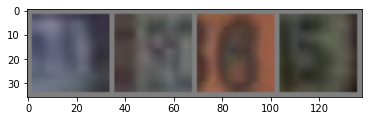

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### 1.1.1 CNN Model
Next, we will train a CNN on the data. We have defined a simple CNN for you with two convolutional layers and two fully-connected layers below.

In [19]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)   # flatten features

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)


Instantiate the cross-entropy loss `criterion`, and an SGD optimizer from the `torch.optim` package with learning rate $.001$ and momentum $.9$. You may also want to enable GPU training using `torch.device()`.

In [20]:
# solution here
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cuda:0


### 1.1.2 Training
Write the training loop that makes two full passes through the dataset (two epochs) using SGD. Your batch size should be 4.

Go slack off for a while...

![reddit xkcd comic](https://i.redd.it/5cjdqxcg07k11.png)

In [21]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        ## -- ! code required  
        inputs, labels = data
        
        optimizer.zero_grad() #1
        output = net(inputs)
        loss = criterion(output, labels)
        loss.backward() #2
        optimizer.step()#3
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.247
[1,  4000] loss: 2.180
[1,  6000] loss: 1.589
[1,  8000] loss: 0.990
[1, 10000] loss: 0.738
[1, 12000] loss: 0.671
[1, 14000] loss: 0.597
[1, 16000] loss: 0.578
[1, 18000] loss: 0.548
[2,  2000] loss: 0.505
[2,  4000] loss: 0.470
[2,  6000] loss: 0.472
[2,  8000] loss: 0.473
[2, 10000] loss: 0.479
[2, 12000] loss: 0.453
[2, 14000] loss: 0.461
[2, 16000] loss: 0.474
[2, 18000] loss: 0.434
Finished Training


### 1.1.3 Test Accuracy
Load the test data (don't forget to move it to GPU if using). Make predictions on it using the trained network and compute the accuracy. You should see an accuracy of above 80%.

In [22]:
def test_on_SVHN(net, testloader):
    
    ## -- ! code required  
    correct = 0
    SUM = 0
    for data in testloader:
        iuputs, labels = data
        outputs = net(iuputs)
        _, predicted = torch.max(outputs.data, dim = 1) #get the index of most correct input
        SUM += labels.size(0)
        correct += (predicted == labels).sum().item() 
        
    acc = (correct/SUM)*100
    return acc

acc = test_on_SVHN(net, testloader)
print('Accuracy of the network on the 10000 test images: %d %%' % (acc))

Accuracy of the network on the 10000 test images: 85 %



### 1.2. Understanding the CNN Architecture

Explain the definition of the following terms. What is the corresponding setting in our SVHN net? Are there any other choices?

  - Stride
  - Padding
  - Non-linearity
  - Pooling
  - Loss function
  - Optimizer
  - Learning rate
  - Momentum


Your answer:

$1$.Stride is the number of pixels shifts over the input matrix. If stride is 1, CNN moves 1 pixels once. So, if we set a too large stride, it may miss some important features, which may cause a not good results.

$2$.Padding essentially makes the feature maps produced by the filter kernels the same size as the original image. In this way, the pixels(features) locateed in the edge area of picture can be considered by CNN, which make sure that every features in picture is used for CNN. And this could improve final accuracy.

$3$.ReLU stands for Rectified Linear Unit for a non-linear operation. The output is $ƒ(x) = max(0,x)$. ReLu solve the gradient vanish in SGD and converge with a quicker rate. But ReLu also have some disadvantages. ReLu is so weak during the training period, which can kill the neurons(Dead ReLu Problem). Therefore, set a proper ReLu is significant.

$4$.Pooling layers are similar to convolutional layers, but they perform a specific function such as max pooling, which takes the maximum value in a certain filter region, or average pooling, which takes the average value in a filter region. These are typically used to reduce the dimensionality of the network. Pooling layers reduce the shape of features, which improve the efficiency of Conv process. Moreover, reducing parameters of feature, Pooling layers also reduce the risk of overfit.

$5$.Neural networks are trained using an optimization process that requires a loss function to calculate the model error.(cross-entropy loss, square-mean loss). Therefore, choosing or setting a proper loss function can gain a better results in trianing process.

$6$.Optimizers are algorithms used to change the weights and learning rate in order to reduce the losses.

$7$.The learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function. Too small LR may cause training process too slow. However, a bigger LR also cause skip the optimal, which could not converge.

$8$.Momentum can accelerate training and learning rate schedules can help to converge the optimization process.

Yes, we can set these terms with different values.(different algorithms for Optimizer, like Adam, Adagrad)

### 1.3. Improving SVHN accuracy

We will now vary the architecture and training hyper-parameters of the network to try and achieve a higher accuracy on the SVHN dataset. Note that human performance on this dataset achieves around a 2% error, as reported in

- *Convolutional Neural Networks Applied to House Numbers Digit Classification*,
Pierre Sermanet, Soumith Chintala, Yann LeCun [ [pdf](https://arxiv.org/pdf/1204.3968.pdf) ]

You may want to read the above paper, as it provides the first exploration of deep learning for this problem. It is possible to achieve an error of less than 2% with modern deep learning methods, see for example this paper:
- *Batch-normalized Maxout Network in Network*, by Chang and Chen
[ [pdf](https://arxiv.org/pdf/1511.02583.pdf) ]

We do not expect you to achieve such results, but you should be able to improve on the initial accuracy we got and increase it to above 90%. It is more important that you try varying different architecture and training settings to understand how they affect (or not) the results.

### 1.3.1 Architecture 
First, try to vary the structure of the network. For example, you can still use  two  convolutional layers, but vary their parameters. You can also try adding more convolutional, pooling and/or fully-connected (FC) layers.

Keep careful track of performance as a function of architecture changes using a table or a plot. For example, you can report the final test accuracy on 3 different numbers of channels (filters), 3 different sizes of kernels, 3 different strides, and 3 different dimensions of the final fully connected layer, using a table like the one below. Each time when you vary one parameter, you should **keep the others fixed at the original value**. 

Explain your results. Note, you're welcome to decide how many training epochs to use, but do report the number you used and keep it the same for all architecture changes (as well as other training hyper-parameters). Be careful not to change more than one thing between training/test runs, otherwise you will not know which of the multiple changes caused the results to change.

**Please implement your experiments in a separate cell, DO NOT change your codes in Q1.1 for this question. During submission, you are Not required to submit any code for this question.**

|Filter|Accuracy|
|--|-------------------------------|
| (3,6)(6,16) | 84% | 
| (3,9)(9,16) | 85% |
| (3,16)(16,24) | 87% |
| (3,24)(24,32) | 87% |

|Kernel size|Accuracy|
|--|-------------------------------|
| (5,5) | 84% | 
| (7,7) | 82% |
| (3,3) | 80% |

|FC layers|Accuracy|
|--|-------------------------------|
| 1 | 84% |
| 2 | 85% |
| 3 | 85% |

|FC size|Accuracy|
|--|-------------------------------|
| 64*2 | 87% |
| 64*3 | 87% |
| 64*4 | 88% |


In [66]:
# solution here

***solution here***

### 1.3.2 Training Hyper-Parameters

Repeat the process for training hyper-parameters, exploring at least three of the following:
- training iterations, optionally with early stopping
- learning rate
- momentum
- optimizer
- initialization
- dropout
- batch normalization
- dataset augmentation

Document your results with tables or figures, and explain what happened. You may want to use Tensorboard (see Problem 2 below) but this is optional.

What is the best accuracy you were able to achieve on the test set, and which factors contributed the most to the improvement? (A good result should be above 85%.)

**Please implement your experiments in a separate cell, DO NOT change your codes in Q1.1 for this question. During submission, you are Not required to submit any code for this question.**


In [32]:
# solution here

|Training iterations|Accuracy|
|--|-------------------------------|
| 2 | 84% |
| 3 | 85% | 
| 6 | 87% |
| 8 | 86% |


|Learning rate|Accuracy|
|--|-------------------------------|
| 0.001 | 84% |
| 0.1 | 25% |
| 0.0001 | 19% | 



|Momentum|Accuracy|
|--|-------------------------------|
| 0.9 | 84% |
| 0.1 | 19% | 
| 0.3 | 41% |
| 0.6 | 84% |

|Optimizer|Accuracy|
|--|-------------------------------|
| SGD | 84% |
| Adam | 85% | 
| Rprop | 46% |


### 1.3.3 The power of CNN

Compare to the results you got from HW2 Q4.6.3, which model learns better on image dataset - MLP or CNN? Explain it.

Hint: You can discuss on accuracy, runtime, number of parameters, etc.

In [7]:
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)


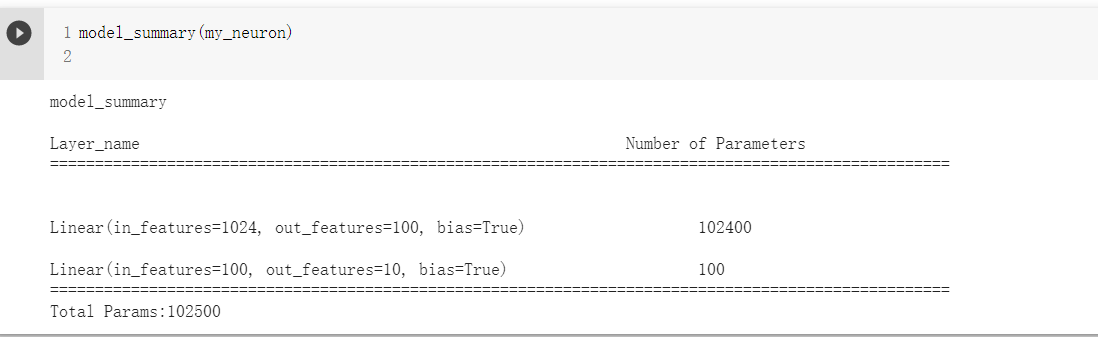

1. Accuracy: MLP accuracy is 75%, CNN accuracy is nearly 88%. 

2. Parameters: From these pictures, we can know the number of CNN parameters is 30584, the MLP is 102500. More parameters could be more expensive

3. Running time: The Running time of CNN model is longer than MLP model in the same iterations.

Hence, CNN learns better than MLP, and CNN is designed for Image Classification.


---


# Problem 2: Tensorboard (Optional)

Explore your network using Tensorboard. Tensorboard is a nice tool for visualizing how your network's training is progressing. The following tutorial provides an introduction to Tensorboard

- [Visualizing models, data and training with Tensorboard](https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html)

For using tensorboard in colab, run the following cell and it should open a tensorboard interface in the output of the cell.


In [6]:
from torch.utils.tensorboard import SummaryWriter

AttributeError: module 'google.protobuf.internal.containers' has no attribute 'MutableMapping'

In [7]:
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
Traceback (most recent call last):
  File "D:\Anaconda3\envs\torch\Scripts\tensorboard-script.py", line 6, in <module>
    from tensorboard.main import run_main
  File "D:\Anaconda3\envs\torch\lib\site-packages\tensorboard\main.py", line 40, in <module>
    from tensorboard import default
  File "D:\Anaconda3\envs\torch\lib\site-packages\tensorboard\default.py", line 38, in <module>
    from tensorboard.plugins.audio import audio_plugin
  File "D:\Anaconda3\envs\torch\lib\site-packages\tensorboard\plugins\audio\audio_plugin.py", line 29, in <module>
    from tensorboard.plugins.audio import metadata
  File "D:\Anaconda3\envs\torch\lib\site-packages\tensorboard\plugins\audio\metadata.py", line 21, in <module>
    from tensorboard.compat.proto import summary_pb2
  File "D:\Anaconda3\envs\torch\lib\site-packages\tensorboard\compat\proto\summary_pb2.py", line 7, in <module>
    from google.protobuf import descriptor a


---

# Problem 3: Save and restore model weights (30 points)

In this section you will learn to save the weights of a trained model, and to load the weights of a saved model. This is really useful when we would like to load an already trained model in order to continue training or to fine-tune it. Often times we save “snapshots” of the trained model as training progresses in case the training is interrupted, or in case we would like to fall back to an earlier model, this is called snapshot saving.


## 3.1 Saving and Loading Weights
In this section you will learn how to [save and load pytorch models for inference](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference).

### 3.1.1 State_dict
In PyTorch, the learnable parameters (i.e. weights and biases) of an torch.nn.Module model are contained in the model’s parameters (accessed with model.parameters()). A state_dict is simply a Python dictionary object that maps each layer to its parameter tensor. Because state_dict objects are Python dictionaries, they can be easily saved, updated, altered, and restored, adding a great deal of modularity to PyTorch models and optimizers.

Print out the keys of state_dict of the model you trained in Q1.1.4. (Note state_dict is a property of the module object.)

In [23]:
# solution here
for i in net.state_dict():
    print(i)

conv1.weight
conv1.bias
conv2.weight
conv2.bias
fc1.weight
fc1.bias
fc2.weight
fc2.bias
fc3.weight
fc3.bias


### 3.1.2 Save state_dict

Save the state_dict of the model in Q1.1.4 with the torch.save() function to a local path.

In [24]:
# solution here
torch.save(net.state_dict(), 'jiahui_nb.pth')

### 3.1.3 Load state_dict

Now let's initiate net2 which has the same structure, and load the weights you saved to net2 by using load_state_dict().

In [25]:
net2 = Net()
## -- ! code required  
net2.load_state_dict(torch.load('jiahui_nb.pth'))
net2.eval()

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)

Test net2's performance on SVHN.

In [26]:
# solution here
def test_on_SVHN(net, testloader):
    
    ## -- ! code required  
    correct = 0
    SUM = 0
    for data in testloader:
        iuputs, labels = data
        outputs = net2(iuputs)
        _, predicted = torch.max(outputs.data, dim = 1) #get the index of most correct input
        SUM += labels.size(0)
        correct += (predicted == labels).sum().item() 
        
    acc = (correct/SUM)*100
    return acc

acc = test_on_SVHN(net2, testloader)
print('Accuracy of the network on the 10000 test images: %d %%' % (acc))

Accuracy of the network on the 10000 test images: 85 %


### 3.2 Fine-tune  a pre-trained model on CIFAR-10

[CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) is another popular benchmark for image classification.


![cifar10_teaser](cifar10.png)

### 3.2.0 Data Download
Similar to Q1.1.2, download the CIFAR-10 dataset using `torchvision` and display the RGB images in the first batch. 

Files already downloaded and verified
Files already downloaded and verified
    1     1     7     9


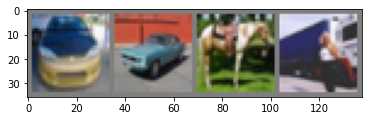

In [27]:
import ssl
import matplotlib.pyplot as plt
import numpy as np
ssl._create_default_https_context = ssl._create_unverified_context


transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

cifar10_trainset = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                        transform=transform, download=True)
cifar10_trainloader = torch.utils.data.DataLoader(cifar10_trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
cifar10_testset = torchvision.datasets.CIFAR10(root='./data', train=False, 
                                        transform=transform, download=True)
cifar10_testloader = torch.utils.data.DataLoader(cifar10_testset, batch_size=4,
                                         shuffle=False, num_workers=2)

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
cifar10_dataiter = iter(cifar10_trainloader)
images, labels = cifar10_dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % labels[j].numpy() for j in range(4)))

### 3.2.1 Load state_dict partially

Let's define net_cifar = Net(), and only load selected weights in selected_layers. 

In [28]:
net_cifar = Net()
selected_layers = ['conv1.weight', 'conv1.bias', 'conv2.weight', 'conv2.bias', 'fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias']

## -- ! code required  
temp = torch.load('jiahui_nb.pth')

sel_dic = {key : temp[key] for key in selected_layers}

net_cifar.load_state_dict(sel_dic, strict=False)



_IncompatibleKeys(missing_keys=['fc3.weight', 'fc3.bias'], unexpected_keys=[])

In [14]:
print(np.array_equal(net_cifar.state_dict()['conv1.weight'].numpy(), net.state_dict()['conv1.weight'].numpy()))
print(np.array_equal(net_cifar.state_dict()['fc3.weight'].numpy(), net.state_dict()['fc3.weight'].numpy()))

True
False


### 3.2.2 Fine-tune net_cifar on CIFAR-10

Fine-tune the net_cifar on CIFAR-10 (you need to train and test the accuracy of net_cifar on CIFAR10 test set instead of on SVHN test set), and show the plot of training loss.

In [29]:
# solution here
import torch.optim as optim

criterion_cifar = nn.CrossEntropyLoss()
optimizer_cifar = optim.SGD(net_cifar.parameters(), lr=0.001, momentum=0.9)
device_cifar = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device_cifar)

cuda:0


In [30]:
# train
stats_loss = []
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(cifar10_trainloader, 0):
        ## -- ! code required  
        inputs, labels = data
        
        optimizer_cifar.zero_grad() #1
        output = net_cifar(inputs)
        loss = criterion_cifar(output, labels)
        loss.backward() #2
        optimizer_cifar.step()#3
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            stats_loss.append(running_loss / 2000)
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.967
[1,  4000] loss: 1.689
[1,  6000] loss: 1.584
[1,  8000] loss: 1.526
[1, 10000] loss: 1.459
[1, 12000] loss: 1.425
[2,  2000] loss: 1.375
[2,  4000] loss: 1.345
[2,  6000] loss: 1.328
[2,  8000] loss: 1.305
[2, 10000] loss: 1.307
[2, 12000] loss: 1.265
[3,  2000] loss: 1.214
[3,  4000] loss: 1.211
[3,  6000] loss: 1.183
[3,  8000] loss: 1.216
[3, 10000] loss: 1.186
[3, 12000] loss: 1.185
[4,  2000] loss: 1.135
[4,  4000] loss: 1.118
[4,  6000] loss: 1.138
[4,  8000] loss: 1.144
[4, 10000] loss: 1.134
[4, 12000] loss: 1.117
[5,  2000] loss: 1.076
[5,  4000] loss: 1.088
[5,  6000] loss: 1.097
[5,  8000] loss: 1.074
[5, 10000] loss: 1.082
[5, 12000] loss: 1.095
Finished Training


In [31]:
def test_on_cafir(net_cifar, cifar10_testloader):
    
    ## -- ! code required  
    correct = 0
    SUM = 0
    for data in cifar10_testloader:
        iuputs, labels = data
        outputs = net_cifar(iuputs)
        _, predicted = torch.max(outputs.data, dim = 1) #get the index of most correct input
        SUM += labels.size(0)
        correct += (predicted == labels).sum().item() 
        
    acc = (correct/SUM)*100
    return acc

acc = test_on_cafir(net_cifar, cifar10_testloader)
print('Accuracy of the network on the 10000 test images: %d %%' % (acc))

Accuracy of the network on the 10000 test images: 61 %


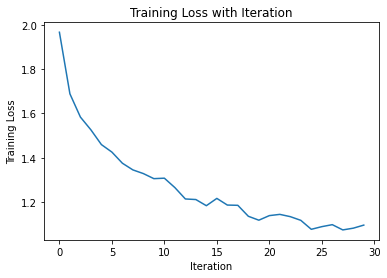

In [32]:
plt.plot(stats_loss)
plt.xlabel('Iteration')
plt.ylabel('Training Loss')
plt.title('Training Loss with Iteration')
plt.show()


---

# Problem 4: Neural style transfer (30 points)

In this problem, we will use deep learning to compose one image in the style of another image. This is known as [neural style transfer](https://towardsdatascience.com/a-brief-introduction-to-neural-style-transfer-d05d0403901d) and the technique is outlined in paper [A Neural Algorithm of Artistic Style (Gatys et al.)](https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/Gatys_Image_Style_Transfer_CVPR_2016_paper.pdf). Please read the paper before you proceed with Problem 4.

Neural style transfer is an optimization technique used to take two images—a content image and a style reference image (such as an artwork by a famous painter)—and blend them together so the output image looks like the content image, but “painted” in the style of the style reference image.

This is implemented by optimizing the output image to match the content statistics of the content image and the style statistics of the style reference image. These statistics are extracted from the images using a convolutional network.

![inputs](https://www.tensorflow.org/tutorials/generative/style_transfer_files/output__UWQmeEaiKkP_0.png)
![output](https://www.tensorflow.org/tutorials/generative/style_transfer_files/output_iYSLexgRKSh-_0.png)

In [1]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from PIL import Image
import matplotlib.pyplot as plt

import torchvision.transforms as transforms
import torchvision.models as models

import copy

## 4.0 Visualize the inputs

We provide two images, starry.jpg and golden.jpg, for style and content input respectively. To save runtime, we downscale the images to (128,128). You are welcome to play with your own inputs at any resolution scale (note a larger resolution requires more runtime). To upload files to your colab notebook, you can click on  `files` on the left side of your notebook then choose upload.

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# desired size of the output image
imsize = (128,128)

loader = transforms.Compose([
    transforms.Resize(imsize),  # scale imported image
    transforms.ToTensor()])  # transform it into a torch tensor


def image_loader(image_name):
    image = Image.open(image_name)
    # fake batch dimension required to fit network's input dimensions
    image = loader(image).unsqueeze(0)
    return image.to(device, torch.float)


style_img = image_loader("starry.jpg")
content_img = image_loader("golden.jpg")

assert style_img.size() == content_img.size(), \
    "we need to import style and content images of the same size"

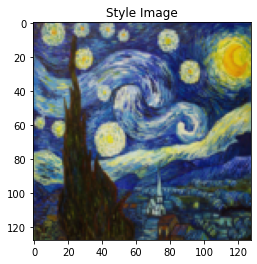

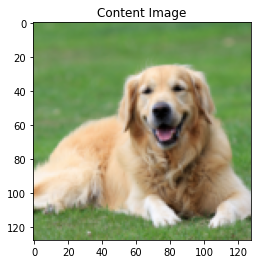

In [3]:
unloader = transforms.ToPILImage()  # reconvert into PIL image

plt.ion()

def imshow(tensor, title=None):
    image = tensor.cpu().clone()  # we clone the tensor to not do changes on it
    image = image.squeeze(0)      # remove the fake batch dimension
    image = unloader(image)
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.pause(0.001) # pause a bit so that plots are updated

plt.figure()
imshow(style_img, title='Style Image')

plt.figure()
imshow(content_img, title='Content Image')

## 4.1 Loss functions

The cost function has two terms - a content loss term and a style loss term, both of which are explained below.

### 4.1.1 Content Loss

The content of an image is represented by the values of the intermediate feature maps.  This is based on the intuition that images with similar content will have similar representation in the higher layers of the network. Let $p$ and $x$ be the original image and the image that is generated,

<img src="content_loss.png" width="300">

where $P^l$ is the representation of the original image and $F^l$ is the representation of the generated image in the feature maps of layer $l$.

Finish the ContentLoss() to match the corresponding content target representations. (hint: You can implement the ContentLoss using pytorch buildin mse_loss())

In [4]:
class ContentLoss(nn.Module):

    def __init__(self, target,):
        super(ContentLoss, self).__init__()
        self.target = target.detach()

    def forward(self, input):       
        self.loss = 0 ## -- ! code required  
        self.loss = F.mse_loss(input, self.target)
        return input


### 4.1.2 Style Loss

The style loss is implemented similarly to the content loss. It will act as a transparent layer in a network that computes the style loss of that layer. In order to calculate the style loss, we need to compute the gram matrix. A gram matrix is the result of multiplying a given matrix by its transposed matrix. 

<img src="gram.png" width="200">


Let $~a$ and $~x$ be the original image and the image that is generated, 

<img src="style_loss.png" width="300">

Here, $A^l$ is the representation of the original image and $G^l$ is the representation of the generated image in layer $l$. $N_l$ is the number of feature maps and $M_l$ is the size of the flattened feature map in layer $l$. $w_l$ is the weight given to the style loss of layer $l$.

Complete the gram_matrix() to alculate a Gram matrix that includes this information and finish the StyleLoss().

In [5]:
def gram_matrix(input):
    gram = 0 ## -- ! code required  
    a, b, c, d = input.size()
    #print(a,b,c,d) a =1, b = N_l, c*d = M_l
    features = input.view(a * b, c * d)
    #print(features)
    G = torch.mm(features, features.t())
    gram = G.div(a * b * c * d) # norm gram to fit in next steps, this is an excellent METHOD
    #print(gram)
    return gram

class StyleLoss(nn.Module):

    def __init__(self, target_feature):
        super(StyleLoss, self).__init__()
        self.target = gram_matrix(target_feature).detach()
    def forward(self, input):        
        self.loss = 0 ## -- ! code required  
        G = gram_matrix(input)
        self.loss = F.mse_loss(G, self.target)  
        return input

### 4.1.3 Import a pre-trained VGG-19.

Now we need to import a pre-trained neural network. We will use a 19 layer VGG network like the one used in the paper.

Import a pretrained VGG-19 from [torchvision.models](https://pytorch.org/docs/stable/torchvision/models.html). Make sure to set the network to evaluation mode using .eval().

In [6]:
## -- ! code required  
import torchvision.models as models

Jiahui_model = models.vgg19(pretrained=True).features.to(device).eval()

### 4.1.4 VGG-19 pre-processing

VGG networks are trained on images with each channel normalized by mean=[0.485, 0.456, 0.406] and std=[0.229, 0.224, 0.225]. 

Complete Normalization() to normalize the image before sending it into the network.

In [7]:
cnn_normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device)
cnn_normalization_std = torch.tensor([0.229, 0.224, 0.225]).to(device)

# create a module to normalize input image so we can easily put it in a nn.Sequential
class Normalization(nn.Module):
    def __init__(self, mean, std):
        super(Normalization, self).__init__()    
        self.mean = torch.tensor(mean).view(-1, 1, 1)
        self.std = torch.tensor(std).view(-1, 1, 1)

#         self.mean = torch.tensor(mean).view(-1, 1, 1)
#         self.std = torch.tensor(std).view(-1, 1, 1)
    def forward(self, img):
        # normalize img
        normalized_img = (img - self.mean)/self.std ## -- ! code required  
        return normalized_img

### 4.1.5 Get content/style representations

Choose intermediate layers from the network to represent the style and content of the image. Use the selected intermediate layers of the model to get the content and style representations of the image. In this problem, you are using the VGG19 network architecture, a pretrained image classification network. These intermediate layers are necessary to define the representation of content and style from the images. 

Note the content_layers and style_layers is a list that may containing multiple layers.  Save the corresponding losses into the  content_losses/style_losses list.

Complete the get_style_model_and_losses() so you can easily extract the intermediate layer values.

In [8]:
def get_style_model_and_losses(Jiahui_model, normalization_mean, normalization_std,
                               style_img, content_img, content_layers, style_layers):
    Jiahui_model = copy.deepcopy(Jiahui_model)

    # normalization module
    normalization = Normalization(normalization_mean, normalization_std).to(device)

    # just in order to have an iterable access to or list of content/syle losses
    content_losses = []
    style_losses = []

    # assuming that cnn is a nn.Sequential, so we make a new nn.Sequential
    # to put in modules that are supposed to be activated sequentially
    model = nn.Sequential(normalization)

    i = 0  # increment every time we see a conv
    for layer in Jiahui_model.children():
        if isinstance(layer, nn.Conv2d):
            i += 1
            name = 'conv_{}'.format(i)
        elif isinstance(layer, nn.ReLU):
            name = 'relu_{}'.format(i)
            layer = nn.ReLU(inplace=False)
        elif isinstance(layer, nn.MaxPool2d):
            name = 'pool_{}'.format(i)
        elif isinstance(layer, nn.BatchNorm2d):
            name = 'bn_{}'.format(i)
        else:
            raise RuntimeError('Unrecognized layer: {}'.format(layer.__class__.__name__))
            
        model.add_module(name, layer)

        if name in content_layers:
            # add content loss:
            ## -- ! code required  
            target = model(content_img).detach()
            content_loss = ContentLoss(target)
            model.add_module("content_loss_{}".format(i), content_loss)
            content_losses.append(content_loss)

            
        if name in style_layers:
            # add style loss:
            ## -- ! code required  
            target_feature = model(style_img).detach()
            style_loss = StyleLoss(target_feature)
            model.add_module("content_loss_{}".format(i), style_loss)
            style_losses.append(style_loss)
            

    # now we trim off the layers after the last content and style losses
    for i in range(len(model) - 1, -1, -1):
        if isinstance(model[i], ContentLoss) or isinstance(model[i], StyleLoss):
            break
    model = model[:(i + 1)]
    return model, style_losses, content_losses



## 4.2 Build the model

### 4.2.1 Perform the neural transfer
 
Finally, we must define a function that performs the neural transfer. To transfer the style of an artwork $~a$ onto a photograph $~p$ we synthesise a new image that simultaneously matches the content representation of $~p$ and the style representation of $~a$. Thus we jointly minimise the distance of the feature representations of an initial image from the content representation of the photograph in one layer and the style representation of the painting defined on a number of layers of the Convolutional Neural Network. The loss function we minimise 

<img src="total_loss.png" width="400">

where α and β are the weighting factors for content and
style reconstruction, respectively. If there were multiple selected layers, just simply sum up the corresponding losses with an equal weight.

For each iteration of the networks, it is fed an updated input and computes new losses. We will run the backward methods of each loss module to dynamicaly compute their gradients. The paper recommends LBFGS, but Adam works okay, too.

Compelte the run_style_transfer().

In [9]:
content_layers_selected = ['conv_4']
style_layers_selected = ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']

def run_style_transfer(Jiahui_model, normalization_mean, normalization_std,
                       content_img, style_img, input_img, num_steps=300,
                       style_weight=1000000, content_weight=1,
                       content_layers=content_layers_selected,
                       style_layers=style_layers_selected):
    """Run the style transfer."""
    print('Building the style transfer model..')
    model, style_losses, content_losses = get_style_model_and_losses(Jiahui_model,
        normalization_mean, normalization_std, style_img, content_img, content_layers, style_layers)

    optimizer = optim.Adam([input_img.requires_grad_()], lr=0.1, eps=1e-1)

    
    print('Optimizing..')
    step_i = [0]
    while step_i[0] <= num_steps:
        input_img.data.clamp_(0, 1)
        
        ## -- ! code required  
        def get_loss():

            optimizer.zero_grad() #1

            model(input_img)
            style_score = 0
            content_score = 0

            for sl in style_losses:
                style_score += sl.loss
            for cl in content_losses:
                content_score += cl.loss

            style_score *= style_weight
            content_score *= content_weight
            loss = style_score + content_score
            loss.backward(retain_graph=True) 

            step_i[0]+= 1
            if step_i[0] % 50 == 0:
                print("run {}:".format(step_i))
                print('Style Loss : {:4f} Content Loss: {:4f}'.format(
                    style_score.item(), content_score.item()))
                print()
                
            return loss
        
        optimizer.step(get_loss)

    # a last correction...
    input_img.data.clamp_(0, 1)

    return input_img

### 4.2.2 Test your model

Now you have done your coding tasks, let's test them!

Building the style transfer model..


D:\Anaconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
D:\Anaconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == '__main__':
D:\Anaconda3\envs\torch\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Optimizing..
run [50]:
Style Loss : 794.708740 Content Loss: 53.402130

run [100]:
Style Loss : 154.897079 Content Loss: 53.402130

run [150]:
Style Loss : 96.086861 Content Loss: 53.402130

run [200]:
Style Loss : 73.411163 Content Loss: 53.402130



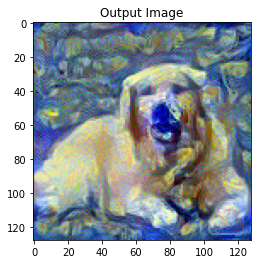

In [10]:
content_layers_selected = ['conv_4']
style_layers_selected = ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
style_weight=1000000
input_img = content_img.clone().detach().requires_grad_(True)

output = run_style_transfer(Jiahui_model, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img, num_steps=200,style_weight=style_weight,
                            content_layers=content_layers_selected,
                            style_layers=style_layers_selected)

plt.figure()
imshow(output, title='Output Image')

plt.ioff()
plt.show()

## 4.3 Content/style loss weight ratio

Try two different style loss weights: 5000 and  10. Discuss what you learn from the results.

Building the style transfer model..
Optimizing..


D:\Anaconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
D:\Anaconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == '__main__':


run [50]:
Style Loss : 2.857870 Content Loss: 53.402130

run [100]:
Style Loss : 0.881172 Content Loss: 53.402130



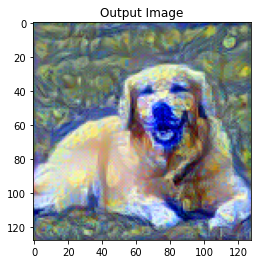

In [11]:
content_layers_selected = ['conv_4']
style_layers_selected = ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
style_weight=5000
input_img = content_img.clone().detach().requires_grad_(True)

output = run_style_transfer(Jiahui_model, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img, num_steps=100,style_weight=style_weight,
                            content_layers=content_layers_selected,
                            style_layers=style_layers_selected)

plt.figure()
imshow(output, title='Output Image')

plt.ioff()
plt.show()

Building the style transfer model..
Optimizing..


D:\Anaconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
D:\Anaconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == '__main__':


run [50]:
Style Loss : 0.171388 Content Loss: 53.402130

run [100]:
Style Loss : 0.112766 Content Loss: 53.402130



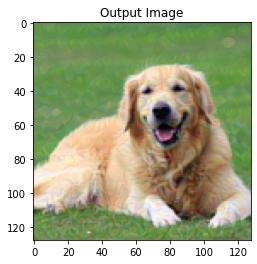

In [12]:
content_layers_selected = ['conv_4']
style_layers_selected = ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
style_weight=10
input_img = content_img.clone().detach().requires_grad_(True)

output = run_style_transfer(Jiahui_model, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img, num_steps=100,style_weight=style_weight,
                            content_layers=content_layers_selected,
                            style_layers=style_layers_selected)

plt.figure()
imshow(output, title='Output Image')

plt.ioff()
plt.show()

***your solution:***

I notice that when style_weight is too small, the output picture is more like content picture. That's because in the loss function, when style_weight is getting smaller, the loss is more decided by content loss.

## 4.4 Choose different intermediate layers

Try three different intermediate layers for style representations: conv_1, conv_3 and conv_5. Discuss what you learn from the results.

Building the style transfer model..
Optimizing..
run [50]:


D:\Anaconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
D:\Anaconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == '__main__':


Style Loss : 2.284749 Content Loss: 3.392004

run [100]:
Style Loss : 0.943311 Content Loss: 2.797124



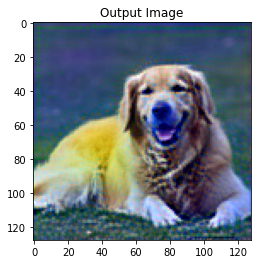

In [13]:
content_layers_selected = ['conv_4']
style_layers_selected = ['conv_1']
style_weight=1000000
input_img = content_img.clone().detach().requires_grad_(True)

output = run_style_transfer(Jiahui_model, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img, num_steps=100,style_weight=style_weight,
                            content_layers=content_layers_selected,
                            style_layers=style_layers_selected)

plt.figure()
imshow(output, title='Output Image')

plt.ioff()
plt.show()

Building the style transfer model..
Optimizing..


D:\Anaconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
D:\Anaconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == '__main__':


run [50]:
Style Loss : 108.095444 Content Loss: 29.901947

run [100]:
Style Loss : 26.061419 Content Loss: 29.155861



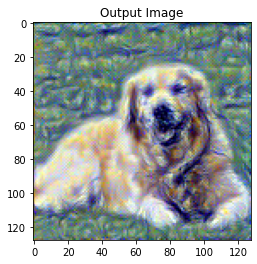

In [14]:
content_layers_selected = ['conv_4']
style_layers_selected = ['conv_3']
style_weight=1000000
input_img = content_img.clone().detach().requires_grad_(True)

output = run_style_transfer(Jiahui_model, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img, num_steps=100,style_weight=style_weight,
                            content_layers=content_layers_selected,
                            style_layers=style_layers_selected)

plt.figure()
imshow(output, title='Output Image')

plt.ioff()
plt.show()

Building the style transfer model..
Optimizing..


D:\Anaconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
D:\Anaconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == '__main__':


run [50]:
Style Loss : 485.565918 Content Loss: 46.365753

run [100]:
Style Loss : 102.007706 Content Loss: 42.930046



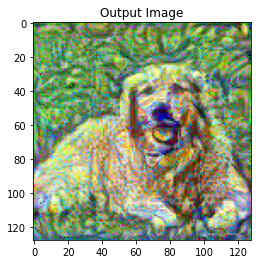

In [15]:
content_layers_selected = ['conv_4']
style_layers_selected = ['conv_5']
style_weight=1000000
input_img = content_img.clone().detach().requires_grad_(True)

output = run_style_transfer(Jiahui_model, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img, num_steps=100,style_weight=style_weight,
                            content_layers=content_layers_selected,
                            style_layers=style_layers_selected)

plt.figure()
imshow(output, title='Output Image')

plt.ioff()
plt.show()

***your solution:***

From these pictures, we can figure out that the style can be defined more locally by lower layers, which contains clearly boundaries like the first picture. When use higher layer for style transfering, the structure of the images are matched on a larger scale, so that the generated picture is smoother like the last picture. And the middle layer has an effect between them. 